 whene not use pca

---



*   when your data in coordinate in the form of circle
*   when your data projection have max overlap


*   when your data have specific pattern

















In [ ]:
import numpy as np
import pandas as pd

np.random.seed(23)
mu_vec1=np.array([0,0,0])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample=np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df=pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target']=1

mu_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample=np.random.multivariate_normal(mu_vec2,cov_mat2,20)

df1=pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])
df1['target']=0
df = pd.concat([df, df1], ignore_index=True)
df.head()


,feature1,feature2,feature3,target
0,0.666988,0.025813,-0.777619,1
1,0.948634,0.701672,-1.051082,1
2,-0.367548,-1.137460,-1.322148,1
3,1.772258,-0.347459,0.670140,1
4,0.322272,0.060343,-1.043450,1


In [ ]:
import plotly.express as px
fig=px.scatter_3d(df,x=df['feature1'],y=df['feature2'],z=df['feature3'],
                  color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
#step 1 mean centring
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])

In [ ]:
covariance_matrix=np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print("cov matrix",covariance_matrix)


cov matrix [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [ ]:
eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)
print("eigen values",eigen_values)
print("eigen vectors",eigen_vectors)

eigen values [1.3536065  0.94557084 0.77774573]
eigen vectors [[-0.53875915 -0.69363291  0.47813384]
 [-0.65608325 -0.01057596 -0.75461442]
 [-0.52848211  0.72025103  0.44938304]]


Populating the interactive namespace from numpy and matplotlib


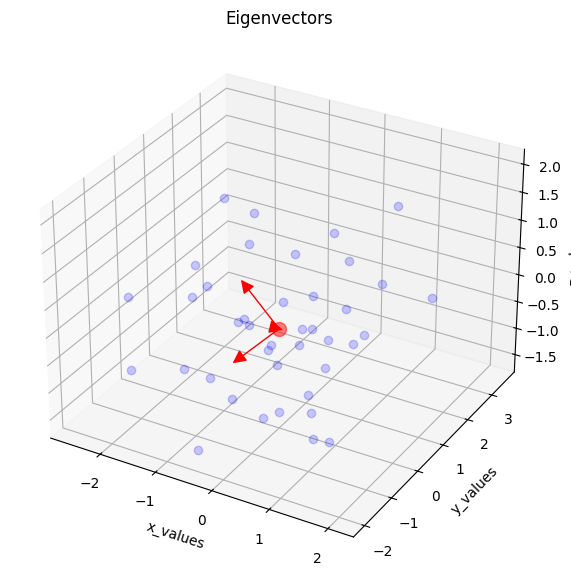

In [ ]:
#code for generating this vectors in 3d space
%pylab inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import numpy as np

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        # Get the projection matrix from the axes object
        M = self.axes.M
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs), np.max(zs)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')
plt.show()

In [ ]:
pc = eigen_vectors[0:2] # Corrected the variable name from eigon_vectors to eigen_vectors
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [ ]:
transformed_df=np.dot(df.iloc[:,0:3],pc.T)
new_df=pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target']=df['target']
new_df.head()

,PC1,PC2,target
0,-0.429384,0.829265,1
1,-1.124520,0.842226,1
2,0.599433,1.795862,1
3,-0.094556,-0.761566,1
4,-0.401542,1.203061,1


In [ ]:
import plotly.express as px
import plotly.colors as colors # Import the colors module from plotly

new_df['target']=new_df['target'].astype('str')
fig=px.scatter(new_df,x=new_df['PC1'],y=new_df['PC2'],
               color=new_df['target'],
               color_discrete_sequence=colors.qualitative.G10)
fig.show()